In [182]:
import numpy as np
import matplotlib.pyplot as plt

In [183]:
T = 200 # days
N0 = 1000
I0 = 1
S0 = N0 - I0
beta = 0.0002

In [184]:
def s(S, I):
    return - beta * S * I

def i(S, I):
    return beta * S * I

In [185]:
dt = 1
t = np.linspace(0, T, int(T/dt) + 1)

In [186]:
# Estimate by Runge-Kutta Method
S_rk = np.zeros(len(t))
S_rk[0] = S0

I_rk = np.zeros(len(t))
I_rk[0] = I0

for it in range(1, len(t)):    
    xk1 = s(S_rk[it-1], I_rk[it-1])
    yk1 = i(S_rk[it-1], I_rk[it-1])
    xk2 = s(S_rk[it-1] + xk1 * dt/2, I_rk[it-1] + yk1 * dt/2)
    yk2 = i(S_rk[it-1] + xk1 * dt/2, I_rk[it-1] + yk1 * dt/2)
    xk3 = s(S_rk[it-1] + xk2 * dt/2, I_rk[it-1] + yk2 * dt/2)
    yk3 = i(S_rk[it-1] + xk2 * dt/2, I_rk[it-1] + yk2 * dt/2)
    xk4 = s(S_rk[it-1] + xk3 * dt, I_rk[it-1] + yk3 * dt)
    yk4 = i(S_rk[it-1] + xk3 * dt, I_rk[it-1] + yk3 * dt)

    S_rk[it] = S_rk[it-1] + (1/6) * dt * (xk1 + 2*xk2 + 2*xk3 + xk4)
    I_rk[it] = I_rk[it-1] + (1/6) * dt * (yk1 + 2*yk2 + 2*yk3 + yk4)

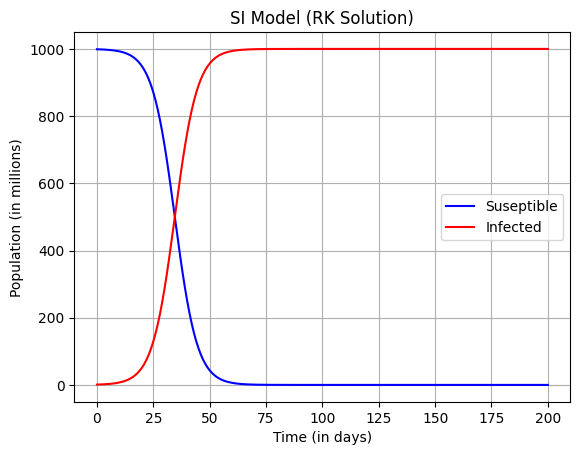

In [187]:
plt.plot(t, S_rk, label='Suseptible', color='blue')
plt.plot(t, I_rk, label='Infected', color='red')
plt.xlabel('Time (in days)')
plt.ylabel('Population (in millions)')
plt.title('SI Model (RK Solution)')
plt.legend()
plt.grid()

plt.show()